In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
from numpy import cov
from scipy.stats import linregress
from scipy.stats import pearsonr

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
overdose_death_rates = "Resources/overdose_death_rates.csv"
prescription_rates = "Resources/opioid_total_us_years.csv"
unemployment_rates = "Resources/unemployment_total_us.csv"

# read as df
overdose_df = pd.read_csv(overdose_death_rates,sep = ";")
prescription_df = pd.read_csv(prescription_rates)
unemployment_df = pd.read_csv(unemployment_rates)

# Read and clean overdose data

In [3]:
overdose_df.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
0,Maryland,2012,13.7,NaN,10.9,NaN,0.17,NaN,0.20,NaN
1,Arizona,2015,19.0,NaN,10.2,NaN,0.04,NaN,0.16,NaN
2,Vermont,2003,10.2,NaN,7.2,NaN,0.36,NaN,0.24,NaN
3,Kansas,2008,8.0,NaN,3.5,NaN,-0.20,NaN,-0.20,NaN
4,Idaho,2009,11.6,NaN,4.2,NaN,0.18,NaN,-0.13,NaN


In [4]:
#group data by states
year_overdose = overdose_df.groupby(["Year"]).mean()
year_overdose=year_overdose.reset_index()
year_overdose

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year
0,1999,5.963265,3.169767,NaN,NaN
1,2000,6.434000,3.506818,0.117143,0.174186
2,2001,7.408000,3.919149,0.195600,0.290930
3,2002,8.522000,4.629787,0.175400,0.244468
4,2003,9.466667,5.341304,0.124400,0.170435
5,2004,9.980000,5.416667,0.078800,0.094130
6,2005,10.586000,5.800000,0.075200,0.105417
7,2006,12.146000,6.683673,0.177600,0.186250
8,2007,12.331373,6.940816,0.034200,0.061042
9,2008,12.678431,7.350980,0.052745,0.075714


# Read and clean prescription data

In [5]:
prescription_df.head()

,Year,Prescriptions Dispensed (millions)
0,1991,76
1,1992,79
2,1993,82
3,1994,85
4,1995,87


# Read and clean unemployment data

In [6]:
unemployment_df=unemployment_df.rename(columns={"Unnamed: 0": "Year"})
#unemployment_df['Year'].round(decimals=0)
unemployment_df=unemployment_df.dropna()
unemployment_df['Year']=unemployment_df['Year'].astype('int32')
unemployment_df.head()

,Year,Unemployment rate
0,1999,4.2
1,2000,4.0
2,2001,4.7
3,2002,5.8
4,2003,6.0


In [7]:
all_data_df=year_overdose.set_index('Year').join(prescription_df.set_index('Year'))
all_data_df=all_data_df.reset_index()
all_data_df

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year,Prescriptions Dispensed (millions)
0,1999,5.963265,3.169767,NaN,NaN,116.0
1,2000,6.434000,3.506818,0.117143,0.174186,126.0
2,2001,7.408000,3.919149,0.195600,0.290930,138.0
3,2002,8.522000,4.629787,0.175400,0.244468,142.0
4,2003,9.466667,5.341304,0.124400,0.170435,149.0
5,2004,9.980000,5.416667,0.078800,0.094130,155.0
6,2005,10.586000,5.800000,0.075200,0.105417,163.0
7,2006,12.146000,6.683673,0.177600,0.186250,174.0
8,2007,12.331373,6.940816,0.034200,0.061042,184.0
9,2008,12.678431,7.350980,0.052745,0.075714,196.0


In [8]:
#remove unecessary columns and dropna
graph_data = all_data_df[['Year',
                          'All Drug Overdose Death Rate (Age-Adjusted)',
                          'Opioid Overdose Death Rate (Age-Adjusted)', 'Prescriptions Dispensed (millions)']]
graph_data=graph_data.dropna()
graph_data

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Prescriptions Dispensed (millions)
0,1999,5.963265,3.169767,116.0
1,2000,6.434000,3.506818,126.0
2,2001,7.408000,3.919149,138.0
3,2002,8.522000,4.629787,142.0
4,2003,9.466667,5.341304,149.0
5,2004,9.980000,5.416667,155.0
6,2005,10.586000,5.800000,163.0
7,2006,12.146000,6.683673,174.0
8,2007,12.331373,6.940816,184.0
9,2008,12.678431,7.350980,196.0


In [9]:
graph_data_unemployment=prescription_df.set_index('Year').join(unemployment_df.set_index('Year'))
graph_data_unemployment=graph_data_unemployment.reset_index()
graph_data_unemployment=graph_data_unemployment.dropna()
graph_data_unemployment

,Year,Prescriptions Dispensed (millions),Unemployment rate
8,1999,116,4.2
9,2000,126,4.0
10,2001,138,4.7
11,2002,142,5.8
12,2003,149,6.0
13,2004,155,5.5
14,2005,163,5.1
15,2006,174,4.6
16,2007,184,4.6
17,2008,196,5.8


# Create a scatter plot to show prescription data and overdose death rates over time

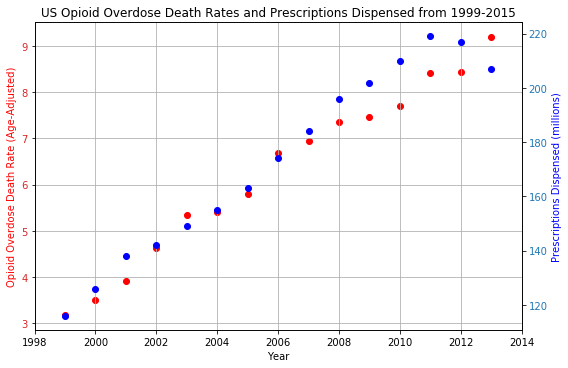

In [10]:
#create twin scatterplots to show timeseries 
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_xlim([1998, 2014])
ax1.set_ylabel('Opioid Overdose Death Rate (Age-Adjusted)', color='red')
ax1.scatter(graph_data['Year'], graph_data['Opioid Overdose Death Rate (Age-Adjusted)'], color='red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Prescriptions Dispensed (millions)', color='blue')  
ax2.scatter(graph_data['Year'], graph_data['Prescriptions Dispensed (millions)'], color='blue')
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y')
ax1.grid(axis='x')

fig.tight_layout()  
plt.title("US Opioid Overdose Death Rates and Prescriptions Dispensed from 1999-2015")
plt.savefig("death_prescription_time.png")
plt.show()

# Create second scatter plot and linnear regression to asses correlation between prescriptions dispensed and opioid overdose death rate

In [11]:
# Set line
(slope, intercept, rvalue, pvalue, stderr) = linregress(graph_data['Prescriptions Dispensed (millions)'], 
                                         graph_data['Opioid Overdose Death Rate (Age-Adjusted)'])
fit = slope * graph_data['Prescriptions Dispensed (millions)'] + intercept


In [13]:
corr, _ = pearsonr(graph_data['Prescriptions Dispensed (millions)'], graph_data['Opioid Overdose Death Rate (Age-Adjusted)'])
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation above .5 indicates a notable correlation')

Pearsons correlation: 0.976
Pearsons correlation above .5 indicates a notable correlation


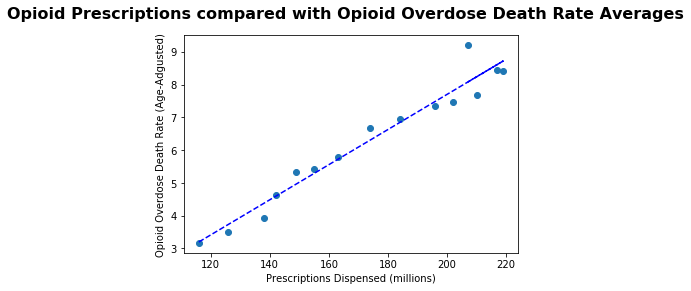

In [14]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Opioid Prescriptions compared with Opioid Overdose Death Rate Averages", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Prescriptions Dispensed (millions)")
ax.set_ylabel("Opioid Overdose Death Rate (Age-Adgusted)")

ax.plot(graph_data['Prescriptions Dispensed (millions)'], 
        graph_data['Opioid Overdose Death Rate (Age-Adjusted)'], linewidth=0, marker='o')
ax.plot(graph_data['Prescriptions Dispensed (millions)'], fit, 'b--')

plt.savefig("prescription_death_regression.png")
plt.show()

# Create graph to show Opiod Prescription rates and Unemployment rate for entire US over time

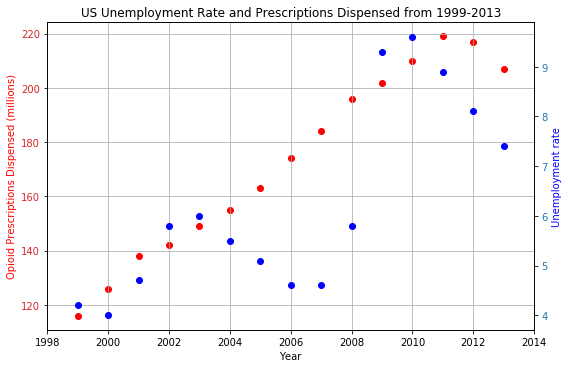

In [15]:
#twin scatter plots for timeseries
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_xlim([1998, 2014])
ax1.set_ylabel('Opioid Prescriptions Dispensed (millions)', color='red')
ax1.scatter(graph_data_unemployment['Year'], graph_data_unemployment['Prescriptions Dispensed (millions)'], color='red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemployment rate', color='blue')  
ax2.scatter(graph_data_unemployment['Year'], graph_data_unemployment['Unemployment rate'], color='blue')
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y')
ax1.grid(axis='x')

fig.tight_layout()  
plt.title("US Unemployment Rate and Prescriptions Dispensed from 1999-2013")
plt.savefig("unemployment_prescriptions_time.png")
plt.show()

In [16]:
# Set lines for linnear regression
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(graph_data['Prescriptions Dispensed (millions)'], 
                                         graph_data_unemployment['Unemployment rate'])
fit2 = slope2 * graph_data['Prescriptions Dispensed (millions)'] + intercept
rvalue

0.9759663772844712

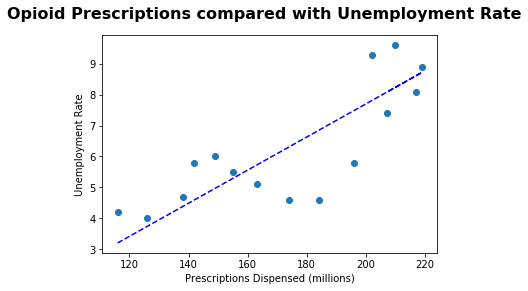

In [17]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Opioid Prescriptions compared with Unemployment Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Prescriptions Dispensed (millions)")
ax.set_ylabel("Unemployment Rate")

ax.plot(graph_data['Prescriptions Dispensed (millions)'], 
        graph_data_unemployment['Unemployment rate'], linewidth=0, marker='o')
ax.plot(graph_data['Prescriptions Dispensed (millions)'], fit, 'b--')
plt.savefig("unemployment_prescription_regression.png")
plt.show()

In [18]:
corr2, _ = pearsonr(graph_data_unemployment['Prescriptions Dispensed (millions)'], graph_data_unemployment['Unemployment rate'])
print('Pearsons correlation: %.3f' % corr2)
print('Pearsons correlation above .5 indicates a notable correlation')

Pearsons correlation: 0.803
Pearsons correlation above .5 indicates a notable correlation
